In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import gpxpy
import haversine

# Read data from the CSV file

In [2]:
df = pd.read_csv("race_results.csv", 
                 parse_dates=["date"], 
                 date_format="%Y-%m-%d")

In [3]:
df

,name,distance,date,city,country,duration,lat,lon,gpxfilename
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0:29:19,41.377388,2.156912,Cursa_Moritz_Sant_Antoni_5km_2025.gpx
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0:27:10,41.448694,2.252070,Cursa_Benèfica_Malalties_Minoritàries_Badalona...
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0:25:36,41.622810,2.676377,Cursa_de_la_Dona_Pineda_de_Mar_5_Km.gpx
3,15a Cursa Nocturna de L'Hospitalet,5,2025-04-05,L'Hospitalet de Llobregat,Spain,0:25:40,41.356897,2.125731,Cursa_Nocturna_de_L_Hospitalet_5_Km.gpx
4,Cursa Montilivi Girona,5,2025-04-27,Girona,Spain,0:28:49,41.960944,2.827218,Cursa_Montilivi_Girona_5_Km.gpx
5,La Cursa de RAC1 Port de Barcelona,6,2025-05-18,Barcelona,Spain,0:30:04,41.375038,2.178087,Cursa_de_RAC1_Port_de_Barcelona_6Km.gpx
6,14a Cursa Popular Illa Carlemany,5,2025-06-01,Andorra la Vella,Andorra,0:25:12,42.509189,1.534211,Cursa_Popular_Illa_Carlemany_Andorra_5_Km.gpx


In [4]:
df.dtypes

name                   object
distance                int64
date           datetime64[ns]
city                   object
country                object
duration               object
lat                   float64
lon                   float64
gpxfilename            object
dtype: object

# Add columns with duration converted into timedelta and seconds

In [72]:
df = df.rename(columns={"duration": "duration_total_timedelta"})

In [73]:
def from_str_to_timedelta(row):
    duration = datetime.strptime(row["duration_total_timedelta"], "%H:%M:%S")
    duration = timedelta(hours=duration.hour, 
                         minutes=duration.minute, 
                         seconds=duration.second)
    return duration

df["duration_total_timedelta"] = df.apply(from_str_to_timedelta, axis=1)

In [85]:
df["duration_total_sec"] = df.apply(lambda row: row["duration_total_timedelta"].seconds, axis=1)

In [86]:
df

,name,distance,date,city,country,duration_total_timedelta,duration_total_sec,duration_km_timedelta,duration_km_sec,duration_km_timedelta_str
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0 days 00:29:19,1759,0 days 00:05:51.800000,351.8,0 days 00:05:51.800000
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0 days 00:27:10,1630,0 days 00:05:26,326.0,0 days 00:05:26
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0 days 00:25:36,1536,0 days 00:05:07.200000,307.2,0 days 00:05:07.200000


In [87]:
df.dtypes

name                                  object
distance                               int64
date                          datetime64[ns]
city                                  object
country                               object
duration_total_timedelta     timedelta64[ns]
duration_total_sec                     int64
duration_km_timedelta        timedelta64[ns]
duration_km_sec                      float64
duration_km_timedelta_str    timedelta64[ns]
dtype: object

# Add column with duration per km in timedelta and seconds

In [88]:
df["duration_km_timedelta"] = df["duration_total_timedelta"] / df["distance"]
df["duration_km_sec"] = df["duration_total_sec"] / df["distance"]

In [78]:
df

,name,distance,date,city,country,duration_total_timedelta,duration_total_sec,duration_km_timedelta,duration_km_sec
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0 days 00:29:19,1759.0,0 days 00:05:51.800000,351.8
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0 days 00:27:10,1630.0,0 days 00:05:26,326.0
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0 days 00:25:36,1536.0,0 days 00:05:07.200000,307.2


In [79]:
df.dtypes

name                                 object
distance                              int64
date                         datetime64[ns]
city                                 object
country                              object
duration_total_timedelta    timedelta64[ns]
duration_total_sec                  float64
duration_km_timedelta       timedelta64[ns]
duration_km_sec                     float64
dtype: object

In [95]:
df["duration_km_timedelta_str"] = df.apply(lambda row: datetime.strftime(datetime(2025, 1, 1)+row["duration_km_timedelta"], "%H:%M:%S"), axis=1)

In [96]:
df

,name,distance,date,city,country,duration_total_timedelta,duration_total_sec,duration_km_timedelta,duration_km_sec,duration_km_timedelta_str
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0 days 00:29:19,1759,0 days 00:05:51.800000,351.8,00:05:51
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0 days 00:27:10,1630,0 days 00:05:26,326.0,00:05:26
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0 days 00:25:36,1536,0 days 00:05:07.200000,307.2,00:05:07


In [97]:
df["duration_km_timedelta_str"]

0    00:05:51
1    00:05:26
2    00:05:07
Name: duration_km_timedelta_str, dtype: object

In [110]:
customdata = np.stack((df["duration_km_timedelta_str"], df["city"]), axis=-1)
customdata

array([['00:05:51', 'Barcelona'],
       ['00:05:26', 'Badalona'],
       ['00:05:07', 'Pineda de Mar']], dtype=object)

In [111]:
np.transpose(customdata)

array([['00:05:51', '00:05:26', '00:05:07'],
       ['Barcelona', 'Badalona', 'Pineda de Mar']], dtype=object)

In [107]:
customdata[0]

array(['00:05:51', 'Barcelona'], dtype=object)

# Plotting - Solution 3

NameError: name 'np' is not defined

In [18]:
duration_values = df["duration_sec"]
duration_values

0    1759.0
1    1630.0
2    1536.0
Name: duration_sec, dtype: float64

In [12]:
delta_duration = 20
min_duration = int(df["duration_sec"].min())
max_duration = int(df["duration_sec"].max())
duration_ticks = range(min_duration, max_duration, delta_duration)

In [13]:
duration_labels = []
time_zero = datetime(2025,1,1)
for tick in duration_ticks:
    duration_labels.append((time_zero + timedelta(seconds=tick)).strftime("%H:%M:%S"))
duration_labels

['00:25:36',
 '00:25:56',
 '00:26:16',
 '00:26:36',
 '00:26:56',
 '00:27:16',
 '00:27:36',
 '00:27:56',
 '00:28:16',
 '00:28:36',
 '00:28:56',
 '00:29:16']

In [16]:
date_values = [date.strftime("%Y-%m-%d") for date in df["date"]]
date_values

['2025-01-26', '2025-02-23', '2025-03-23']

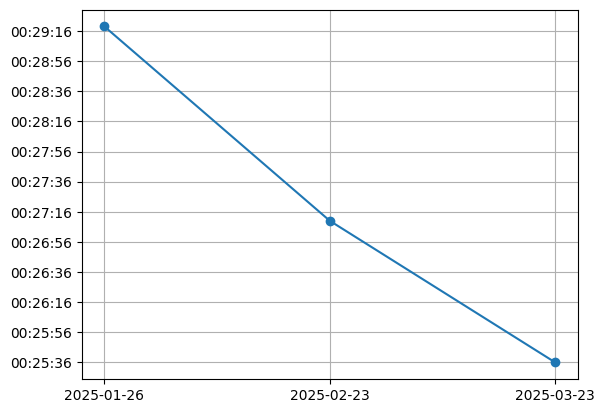

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(date_values, duration_values, marker='o')
ax.set_yticks(duration_ticks, duration_labels)

ax.grid()
plt.show()

# Plotting - Solution 2

In [138]:
durations = df["duration_sec"].tolist()
durations

[1759.0, 1630.0, 1536.0]

In [132]:
delta_sec = 20
minlim = int(min(durations) - delta_sec)
maxlim = int(max(durations) + delta_sec)
durations_ticks = range(minlim, maxlim, delta_sec)

In [133]:
durations_labels = []
timeZero = datetime(2025,1,1)
for duration in durations_ticks:
    durations_labels.append((timeZero + timedelta(seconds=duration)).strftime("%H:%M:%S"))
durations_labels

['00:25:16',
 '00:25:36',
 '00:25:56',
 '00:26:16',
 '00:26:36',
 '00:26:56',
 '00:27:16',
 '00:27:36',
 '00:27:56',
 '00:28:16',
 '00:28:36',
 '00:28:56',
 '00:29:16',
 '00:29:36']

In [134]:
dates = df["date"].tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]
dates

['2025-01-26', '2025-02-23', '2025-03-23']

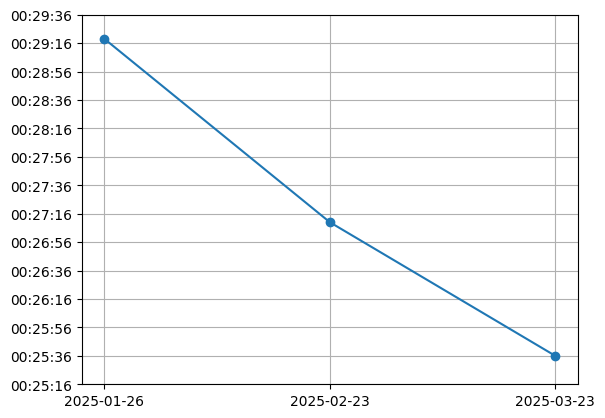

In [139]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(dates, durations, marker='o')
ax.set_yticks(durations_ticks, durations_labels)

ax.grid()
plt.show()

# Plotting - Solution 1

In [62]:
dates = df["date"].tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]
durations = df["duration_timedelta"].tolist()

In [63]:
dates

['2025-01-26', '2025-02-23', '2025-03-23']

In [76]:
import matplotlib.dates as mdates

zero = datetime(2025,1,1)
time = [zero + t for t in durations]
zero = mdates.date2num(zero)
time = [t-zero for t in mdates.date2num(time)]
time

[np.float64(0.02035879629693227),
 np.float64(0.018865740741603076),
 np.float64(0.01777777777897427)]

In [85]:
division = mdates.date2num(datetime(2025,1,1) + timedelta(seconds=10)) - zero
division

np.float64(0.00011574074233067222)

In [94]:
range_yticks = np.arange(min(time) - division, max(time) + division, division)
range_yticks

array([0.01766204, 0.01777778, 0.01789352, 0.01800926, 0.018125  ,
       0.01824074, 0.01835648, 0.01847222, 0.01858796, 0.0187037 ,
       0.01881944, 0.01893519, 0.01905093, 0.01916667, 0.01928241,
       0.01939815, 0.01951389, 0.01962963, 0.01974537, 0.01986111,
       0.01997685, 0.02009259, 0.02020833, 0.02032407, 0.02043981])

AttributeError: 'numpy.ndarray' object has no attribute 'tostring'

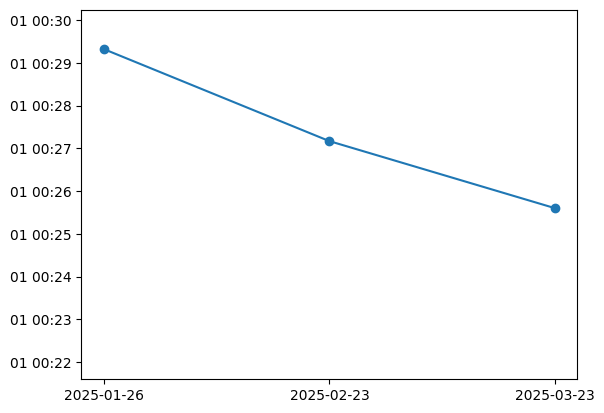

In [96]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(dates, time, marker='o')
ax.set_ylim(0.015, 0.021)
ax.yaxis_date()
ax.set_yticks(range_yticks, range_yticks.tostring())
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.set_xticks(dates, dates, rotation=45)

ax.grid()
plt.show()

# Parse the .GPX files

In [8]:
def parse_gpx_file(filepath):
    lat = []
    lon = []
    elev = []
    time = []
    gpx_file = open(filepath, 'r')
    gpx = gpxpy.parse(gpx_file)
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                lat.append(point.latitude)
                lon.append(point.longitude)
                elev.append(point.elevation)
                time.append(point.time)
    return lat, lon, elev, time

In [9]:
GPX_FILEPATH = 'race_data/'
lat, lon, elev, time = parse_gpx_file(GPX_FILEPATH + df["gpxfilename"][0])

In [33]:
rhytm = []
for idx in range(1, len(lat)):
    # Point0: lat[idx - 1], lon[idx - 1], time[idx - 1]
    # Point1: lat[idx], lon[idx], time[idx]
    dist = haversine.haversine((lat[idx - 1], lon[idx - 1]), (lat[idx], lon[idx]))
    timediff = time[idx] - time[idx - 1]
    if dist > 0:
        rhytm.append(timediff.seconds / dist * (1 / 60))

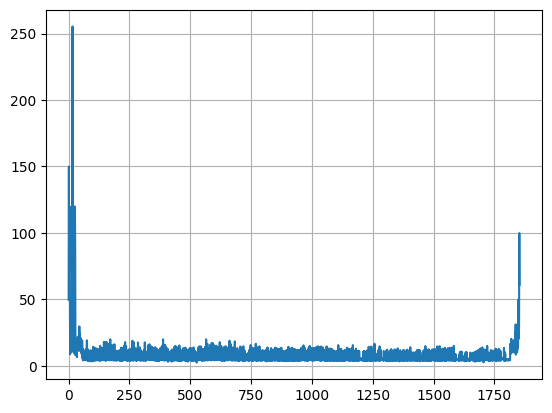

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(rhytm)

ax.grid()
plt.show()

In [35]:
sum(rhytm) / len(rhytm)

8.371623406331409

In [44]:
dist_total = 0
timediff_total_total = 0
timediff_total = 0

for idx in range(1, len(lat)):
    # Point0: lat[idx - 1], lon[idx - 1], time[idx - 1]
    # Point1: lat[idx], lon[idx], time[idx]
    dist = haversine.haversine((lat[idx - 1], lon[idx - 1]), (lat[idx], lon[idx]))
    timediff = time[idx] - time[idx - 1]

    dist_total_total += dist
    timediff_total_total += timediff.seconds
    dist_total += dist
    timediff_total += timediff.seconds

    if dist_total > 1:
        print(timedelta(seconds=timediff_total))
        dist_total = 0
        timediff_total = 0
print(timedelta(seconds=timediff_total / dist_total))

0:08:32
0:05:59
0:05:53
0:05:30
0:05:23
0:07:21.359831


In [45]:
print(timedelta(seconds=timediff_total_total / dist_total_total))

0:06:17.480321


In [60]:
df["lat_array"] = None

In [79]:
df.at[0, "lat_array"] = np.array(lat)

In [80]:
df

,name,distance,date,city,country,duration,lat,lon,gpxfilename,lat_array
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0:29:19,None,2.156912,Cursa_Moritz_Sant_Antoni_5km_2025.gpx,"[41.377388, 41.377388, 41.37739, 41.377391, 41..."
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0:27:10,None,2.252070,Cursa_Benèfica_Malalties_Minoritàries_Badalona...,None
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0:25:36,None,2.676377,Cursa_de_la_Dona_Pineda_de_Mar_5_Km.gpx,None
3,15a Cursa Nocturna de L'Hospitalet,5,2025-04-05,L'Hospitalet de Llobregat,Spain,0:25:40,None,2.125731,Cursa_Nocturna_de_L_Hospitalet_5_Km.gpx,None
4,Cursa Montilivi Girona,5,2025-04-27,Girona,Spain,0:28:49,None,2.827218,Cursa_Montilivi_Girona_5_Km.gpx,None
5,La Cursa de RAC1 Port de Barcelona,6,2025-05-18,Barcelona,Spain,0:30:04,None,2.178087,Cursa_de_RAC1_Port_de_Barcelona_6Km.gpx,None
6,14a Cursa Popular Illa Carlemany,5,2025-06-01,Andorra la Vella,Andorra,0:25:12,None,1.534211,Cursa_Popular_Illa_Carlemany_Andorra_5_Km.gpx,None


In [86]:
df.at[0, "lat_array"][0]

np.float64(41.377388)